# Testing Models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Hypothesis : Can we predict room revenue with rooms sold and rate?


In [3]:
#read data
df = pd.read_csv("C:/Users/kapali_s/Documents/SMU/Projects/Project_3/Project 3 Submissions/Predictive/dailydatapredidct.csv")
df.head()

,date,rooms,rev,rate
0,20170614.0,22.0,6871.0,145.37
1,20170615.0,14.0,4664.0,127.18
2,20170616.0,8.0,914.0,96.87
3,20170617.0,10.0,1172.0,94.96
4,20170618.0,10.0,2746.0,116.78


In [4]:
df = df.sort_values('rev', ascending = False).reset_index()

# Revenue and Rooms

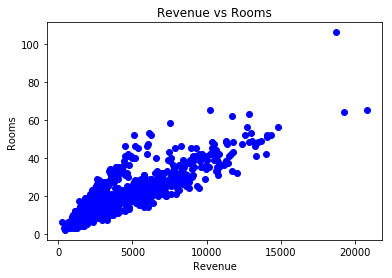

In [5]:
#plot
plt.scatter(df['rev'],df['rooms'],marker='o',c='blue')
plt.title("Revenue vs Rooms")
plt.xlabel("Revenue")
plt.ylabel("Rooms")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008A15B38>]],
      dtype=object)

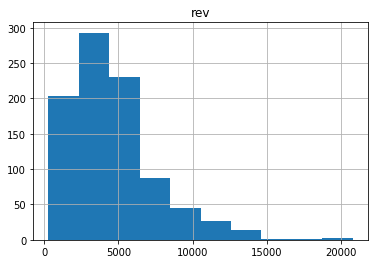

In [6]:
df.hist(column = 'rev', bins=10)

In [7]:
df.rev.describe()
pd.cut(df['rev'],10)

0      (18719.7, 20768.0]
1      (18719.7, 20768.0]
2      (16671.4, 18719.7]
3      (14623.1, 16671.4]
4      (12574.8, 14623.1]
5      (12574.8, 14623.1]
6      (12574.8, 14623.1]
7      (12574.8, 14623.1]
8      (12574.8, 14623.1]
9      (12574.8, 14623.1]
10     (12574.8, 14623.1]
11     (12574.8, 14623.1]
12     (12574.8, 14623.1]
13     (12574.8, 14623.1]
14     (12574.8, 14623.1]
15     (12574.8, 14623.1]
16     (12574.8, 14623.1]
17     (12574.8, 14623.1]
18     (10526.5, 12574.8]
19     (10526.5, 12574.8]
20     (10526.5, 12574.8]
21     (10526.5, 12574.8]
22     (10526.5, 12574.8]
23     (10526.5, 12574.8]
24     (10526.5, 12574.8]
25     (10526.5, 12574.8]
26     (10526.5, 12574.8]
27     (10526.5, 12574.8]
28     (10526.5, 12574.8]
29     (10526.5, 12574.8]
              ...        
888     (264.517, 2333.3]
889     (264.517, 2333.3]
890     (264.517, 2333.3]
891     (264.517, 2333.3]
892     (264.517, 2333.3]
893     (264.517, 2333.3]
894     (264.517, 2333.3]
895     (264

In [8]:
df1 = df.dropna()

In [9]:
#assign data to X and y
X = df1[["rooms"]].values
y = df1["rev"]
print(X.shape, y.shape)

(902, 1) (902,)


In [10]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#create model using linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
#X_train

In [13]:
#fit the model
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score Rev vs Rooms: {training_score}")
print(f"Testing Score Rev vs Rooms: {testing_score}")

Training Score Rev vs Rooms: 0.686455142640532
Testing Score Rev vs Rooms: 0.6980897278384115


Text(0.5, 1.0, 'Residual Plot Rev vs Rooms')

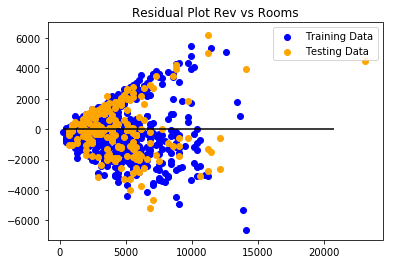

In [14]:
#plot residuals for training and test data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot Rev vs Rooms")

# Revenue and Rate

In [15]:
df.head()

,index,date,rooms,rev,rate
0,153,20171115.0,65.0,20768.0,167.38
1,285,20180327.0,64.0,19222.0,155.39
2,712,20190609.0,106.0,18677.0,115.06
3,354,20180605.0,56.0,14785.0,152.18
4,7,20170621.0,52.0,14344.0,153.64


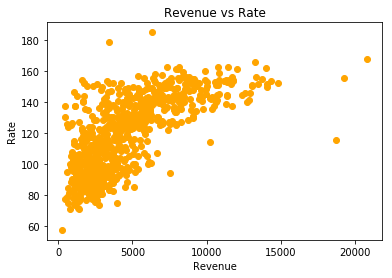

In [16]:
plt.scatter(df.loc[:,'rev'],df.loc[:,'rate'],marker='o',c='orange')
plt.title("Revenue vs Rate")
plt.xlabel("Revenue")
plt.ylabel("Rate")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008D09780>]],
      dtype=object)

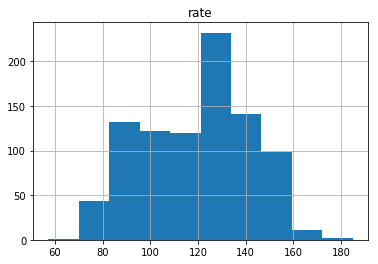

In [17]:
df.hist(column = 'rate', bins=10)

In [18]:
dfSub = df[["rev", "rate"]]

In [19]:
dfSub.corr()

,rev,rate
rev,1.000000,0.701763
rate,0.701763,1.000000


In [20]:
#assign data to X and y
X = df1[["rate"]]
y = df1["rev"].values.reshape(-1, 1)
print(X.shape, y.shape)

(902, 1) (902, 1)


In [21]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
XTests = [x[0] for x in X_test.values]
YTests = [y[0] for y in y_test]

In [23]:
testFrame = pd.DataFrame(list(zip(XTests, YTests)))

In [24]:
testFrame

,0,1
0,84.76,1158.0
1,126.45,938.0
2,82.83,1031.0
3,87.94,1747.0
4,97.40,3415.0
5,149.47,14036.0
6,116.62,2432.0
7,133.77,6156.0
8,99.33,2697.0
9,114.86,4881.0


In [25]:
testFrame.corr()

,0,1
0,1.000000,0.694855
1,0.694855,1.000000


In [26]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)


In [27]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

In [28]:
# # Create a LinearRegression model and fit it to the scaled training data

# ### BEGIN SOLUTION
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# ### END SOLUTION

In [29]:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#  # Make predictions using the X_test_scaled data
# # Plot y_test_scaled vs y_test_scaled
# # Scatter plot y_test_scaled vs predictions

# ### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

In [31]:
# # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# ### BEGIN SOLUTION
# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [32]:
# # LASSO model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Lasso

# ### BEGIN SOLUTION
# lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = lasso.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = lasso.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [33]:
# # Ridge model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Ridge

# ### BEGIN SOLUTION
# ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = ridge.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = ridge.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [34]:
#  # ElasticNet model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import ElasticNet

# ### BEGIN SOLUTION
# elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = elasticnet.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = elasticnet.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [35]:
# #create model using linear regression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()


In [36]:
# #fit the model
# model.fit(X_train, y_train)
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)

# ### END SOLUTION 

# print(f"Training Score Rev vs Rate: {training_score}")
# print(f"Testing Score Rev vs Rate: {testing_score}")


In [37]:
# #plot residuals for training and test data
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot Room vs Rate")


# Try rooms and rate

In [38]:
#assign data to X and y
X = df1[["rooms","rate"]]
y = df1["rev"].values.reshape(-1, 1)
print(X.shape, y.shape)

(902, 2) (902, 1)


In [39]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [42]:
#create model using linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = LinearRegression()
#fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

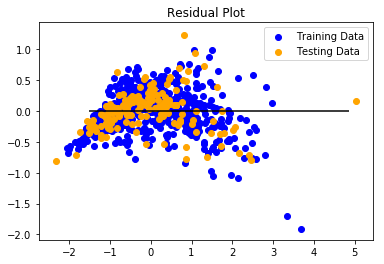

In [44]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [45]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score : {testing_score}")

Training Score: 0.9023832871328847
Testing Score : 0.9026511370173647


Text(0.5, 1.0, 'Residual Plot ')

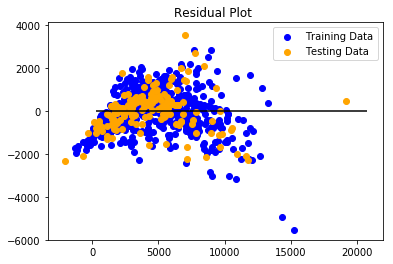

In [46]:
#plot residuals for training and test data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot ")

In [47]:
#predict test data
y_pred = model.predict(X_test)


In [48]:
y_pred

array([[ 5530.69551914],
       [ 1717.54563878],
       [ 4979.78994344],
       [ 1956.84748934],
       [ 3031.58679438],
       [ 2892.19289294],
       [ 4318.55610363],
       [ 1127.78313383],
       [ 2265.8164736 ],
       [10896.55876305],
       [  129.54734833],
       [ 5608.91975219],
       [ 1099.23979785],
       [ 7118.57516105],
       [ 5605.40676435],
       [ 3329.73181083],
       [ 4235.92870897],
       [ 2060.36322121],
       [ 7814.89179159],
       [ 5179.29698376],
       [ 5794.74271354],
       [ 2901.4857371 ],
       [ 8933.53213739],
       [ 4895.34642083],
       [ 4461.94951387],
       [ 4785.38602913],
       [ 6581.2588694 ],
       [ 2433.87235957],
       [ 9642.93960421],
       [ 5667.03910007],
       [ 3745.89587057],
       [ 6280.46718526],
       [ 1496.40258963],
       [ 5933.59046003],
       [ 7627.07503924],
       [  707.34648783],
       [ 6449.79304421],
       [ 5852.87398823],
       [ 5411.79822888],
       [ 1713.54613   ],


In [49]:
df2 = pd.DataFrame(list(zip([y[0] for y in y_train], [y[0] for y in y_test])))
df2

,0,1
0,8612.00,5769.00
1,4756.00,2247.00
2,8927.00,4861.00
3,3642.00,1753.00
4,2129.00,2746.00
5,3753.78,2830.00
6,5225.00,3990.00
7,4566.00,1813.00
8,3843.00,3071.00
9,19222.00,12879.00


In [50]:
#evaluate the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 651.7758559012071
Mean Squared Error: 783712.4884035472
Root Mean Squared Error: 885.2753743347587


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, np.repeat(np.average(y_test), len(y_test))))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, np.repeat(np.average(y_test), len(y_test))))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, np.repeat(np.average(y_test), len(y_test)))))

Mean Absolute Error: 2082.9446457678337
Mean Squared Error: 8050556.158456024
Root Mean Squared Error: 2837.3502001790375


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
y_train

array([[ 8612.  ],
       [ 4756.  ],
       [ 8927.  ],
       [ 3642.  ],
       [ 2129.  ],
       [ 3753.78],
       [ 5225.  ],
       [ 4566.  ],
       [ 3843.  ],
       [19222.  ],
       [ 3990.  ],
       [ 5196.  ],
       [  821.01],
       [ 1275.  ],
       [ 5837.  ],
       [ 1532.  ],
       [ 1717.  ],
       [ 7230.  ],
       [ 4127.  ],
       [ 5755.  ],
       [ 1831.  ],
       [ 2466.  ],
       [ 2007.  ],
       [ 5136.  ],
       [ 3990.  ],
       [ 1424.  ],
       [ 5903.  ],
       [ 6817.  ],
       [ 3104.  ],
       [ 5136.  ],
       [ 2543.  ],
       [ 4101.  ],
       [ 2859.  ],
       [  677.  ],
       [ 5225.  ],
       [ 2715.  ],
       [ 9952.  ],
       [10519.  ],
       [ 5070.  ],
       [ 6509.  ],
       [ 3990.  ],
       [  719.  ],
       [ 3150.  ],
       [ 3426.  ],
       [ 3990.  ],
       [10694.  ],
       [ 3679.  ],
       [ 1123.  ],
       [12373.  ],
       [ 1172.  ],
       [ 6912.  ],
       [ 6111.  ],
       [ 551

In [54]:
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\kapali_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8864373113016418

In [55]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.6311568444616951, 'rooms'), (0.3688431555383049, 'rate')]

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb = GradientBoostingRegressor(n_estimators=200)
gb = gb.fit(X_train, y_train)
gb.score(X_test, y_test)

C:\Users\kapali_s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9011557455864792

In [58]:
sorted(zip(gb.feature_importances_, X_train.columns), reverse=True)

[(0.6259333929507264, 'rooms'), (0.37406660704927375, 'rate')]

In [59]:
df1[["rooms","rev"]].corr()["rev"][0]

0.8306758376607204

In [60]:
df1[["rate","rev"]].corr()["rev"][0]

0.7017630570680892

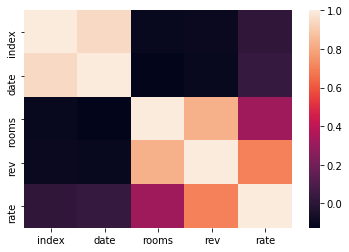

In [61]:
import seaborn as sns
sns.heatmap(df1.corr())